<a href="https://colab.research.google.com/github/govindakolli/Pytorch/blob/main/01_PyTorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PyTorch Workflow**

Resource : https://www.learnpytorch.io/01_pytorch_workflow/

In [ ]:
pytorch_workflow = {

                    1 : "data (prepare and load)",
                    2 : "building model",
                    3 : "fitting the model to data (training)",
                    4 : "making predictions and evaluating a model (inference)",
                    5 : "saving and loading a model",
                    6 : "putting it all together"

}

pytorch_workflow

{1: 'data (prepare and load)',
 2: 'building model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import numpy as np
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# check pytorch version
torch.__version__


'2.6.0+cu124'

## 1. Data (preparing and loading)

Data can be anything in machine learning

* Excel spreadsheet
* Images
* Videos
* Audio
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into numerical representations.
2. Build a model to learn patterns in that numerical representations.

Let's use a linear regression formula to make  a straight line with *known* **parameters**.

In [ ]:
# Create known parameters
weight = 0.7
bias = 0.3

#create LR
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias

X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X),len(Y)

(50, 50)

## Splitting data into training and test sets



In [ ]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

Visualize Vizualize

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = Y_train,
                     test_data = X_test,
                     test_labels = Y_test,
                     predictions = None  ):
  """
  Plot training data, test data and compare predictions
  """
  plt.figure(figsize = (10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Training data")

  #plot test data in green
  plt.scatter(test_data, test_labels, c = "g", s = 4, label = "Test data")

  #Are there predictions
  if predictions is not None:
    plt.scatter(test_data, predictions, c = "r", s= 4, label = "Predictions")

  #Plot Legend
  plt.legend(prop={"size":14});

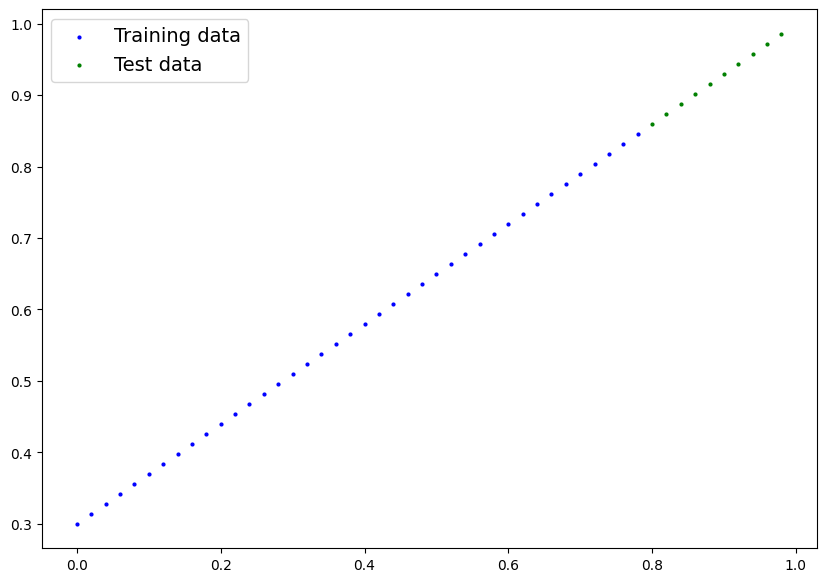

In [ ]:
plot_predictions();

## 2. Building model

OOP Python : https://realpython.com/python3-object-oriented-programming/

What our model does :    
* start with random values(weights and bias)
* Look at trainging data and adjust the random values to better represent the ideal values

How does is do so ?

 Through two main algorirthms:   
 1. Gradient descent
 2. Backpropagation

In [ ]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module):# <- almost everything in PyTorch is inherited from nn.Module
  def __init__(self):
    super().__init__()# Initialize model parameters
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                        requires_grad = True,
                                        dtype = torch.float))

  # Forward method to define computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formula


### PyTorch Model building essentials

* `torch.nn`
* `torch.nn.Parameter`
* `torch.nn.Module`
* `torch.optim`
* `def forward()`

PyTorch cheatsheet : https://docs.pytorch.org/tutorials/beginner/ptcheat.html

In [ ]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

### Check model contents of our PyTorch model

Check our model parameters or what's inside our model using `.parameter()`.

In [ ]:
# Create a random seed
torch.manual_seed(42)

#Create an instance of the model ( this is a subclass of nn.Module )
model_0 = LinearRegressionModel()

#Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
 # List named parameters
 model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

To check our model predictive power, let's see how well it predicts `Y_test` given 'X_test`.

When we pass data through our model, it's going to run it through the `forward()` method.

Difference btw `.no_grad()` and `.inference_mode()` :https://x.com/PyTorch/status/1437838231505096708?lang=en

In [ ]:
y_prediction = model_0(X_test)
y_prediction

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [ ]:
# Making predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
with torch.no_grad():
  y_pred = model_0(X_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

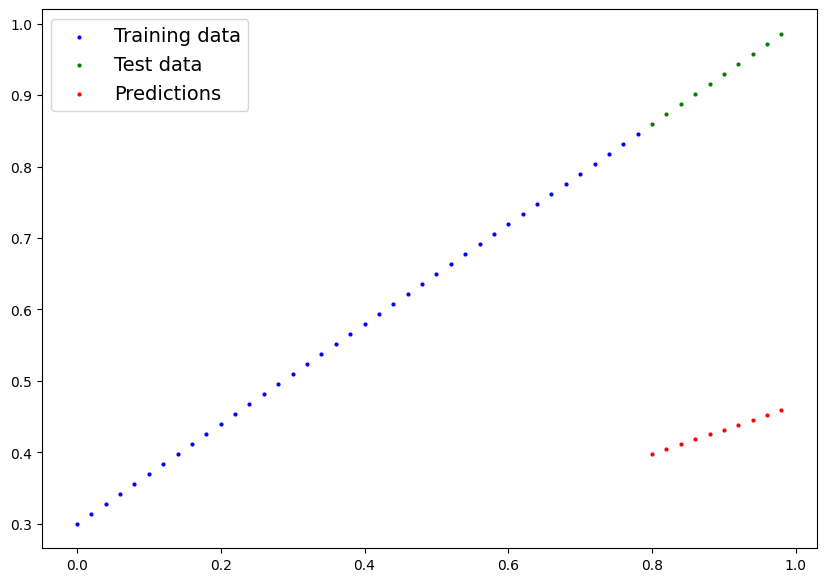

In [ ]:
plot_predictions(predictions=y_preds)

## 3. Train model

Right now our model is making predictions using random parameters to make calculations, it's basically guessing (randomly).

To fix that, we can update its internal parameters (also refer to parameters as patterns), the `weights` and `bias` values we set randomly using `nn.Parameter()` and `torch.randn()` to be something that better represents the data.

How poor or how wrong our model predicting? Is measured using a loss function

* Note : Loss function may also be called as cost function or criterion in different  areas.

Things we need to train :

* **Loss Function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weights and bias) to improve loss function.

And scefically for PyTorch, we need:
* A training loop
* A testing loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer(Stochastic Gradient Descent )
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

In [ ]:
loss_fn

L1Loss()

### Building a training loop ( and a testing loop ) in PyTorch

A couple of things we need in a training loop :    
0. Loop through data
1. Forward pass to make predictions -  also called Forward Propagation
2. Calculate loss
3. Optimizer zero grad
4. Loss backward
5. Optimizer step

In [ ]:
torch.manual_seed(42)

# An epoch is one loop through the data ( this is hyperparameter)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

###Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients  to require gradients

  #1. Forward pass
  y_pred = model_0(X_train)

  #2. Calculate loss
  loss = loss_fn(y_pred, Y_train)
  #print(f"loss : {loss}")

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Loss backward(Backpropagation)\
  loss.backward()

  #5. Step the optimizer (perform gradient descent )
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so ... we have to zero them above in step 3  for yhe next iteration

  #Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing
  with torch.inference_mode(): #turns off gradient tracking & a couple more things behind the scenes
    # with torch.no_grad(): in older versions
    #1. Forward pass
    test_pred = model_0(X_test)

    #2. Calculate the loss
    test_loss = loss_fn(test_pred, Y_test)
  # Print out what's happenin'
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch : {epoch} | Loss : {loss} | Test loss : {test_loss}" )


    # Print out model state_dict()
    print(model_0.state_dict())

Epoch : 0 | Loss : 0.31288138031959534 | Test loss : 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch : 10 | Loss : 0.1976713240146637 | Test loss : 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch : 20 | Loss : 0.08908725529909134 | Test loss : 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch : 30 | Loss : 0.053148526698350906 | Test loss : 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch : 40 | Loss : 0.04543796554207802 | Test loss : 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch : 50 | Loss : 0.04167863354086876 | Test loss : 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch : 60 | Loss : 0.03818932920694351 | Test loss : 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('

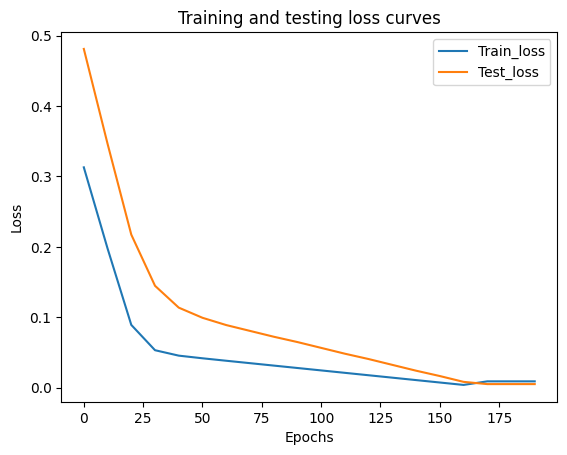

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label = "Train_loss")
plt.plot(epoch_count, test_loss_values, label='Test_loss')
plt.title("Training and testing loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
#list(model_0.parameters())
weight, bias

(0.7, 0.3)

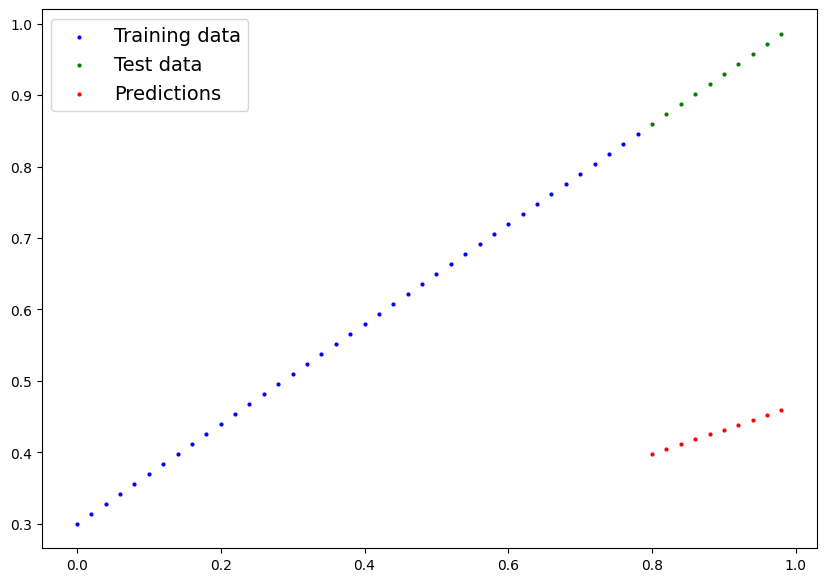

In [ ]:
plot_predictions(predictions= y_preds)

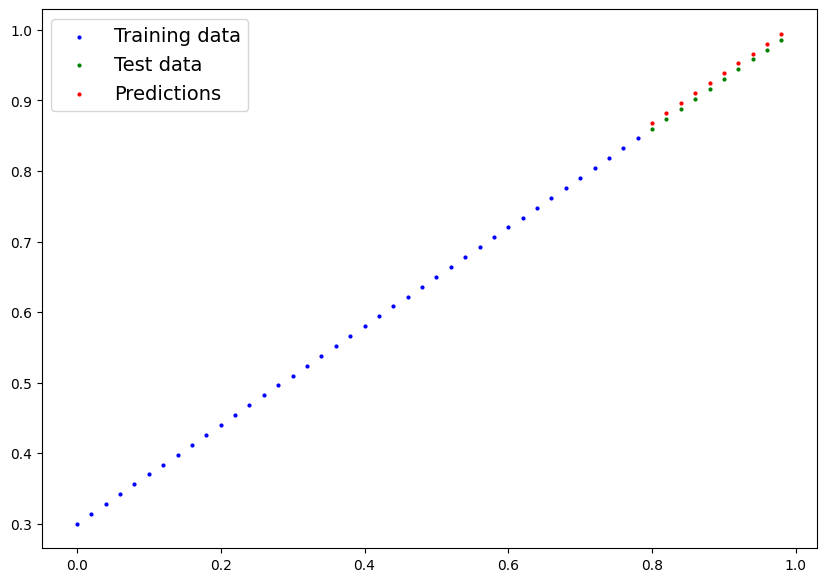

In [ ]:
plot_predictions(predictions= y_preds_new)

## Saving a model in PyTorch

There are three main methods you should about for saving and loading models in PyTorch.

1. `torch.save()` - allows you save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

#2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Save the model state_dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)


Saving model to : models/01_pytorch_workflow_model_0.pt


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 May 17 04:40 01_pytorch_workflow_model_0.pt


## Load a PyTorch model

Since we saved our model's `state_dict()` rather than entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

 # Load the saved state_dict() of model_0 (this will update the new instance with updated parameters )
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

In [ ]:
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and see it all at one place.

In [ ]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.6.0+cu124'

Create device-agnostic code

This means if we've got access to a GPU, our code will use it.

If no GPU is available, the code will default to using CPU.

In [ ]:
# Setup device-agnostic code
device  = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device using :{device}")

Device using :cpu


### 6.1 Data

In [ ]:
# Create some data using linear regression formula y = mx + b
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) #without unsqueeze, errors will pop up
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split],y[:train_split]

X_test, y_test = X[train_split:],y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

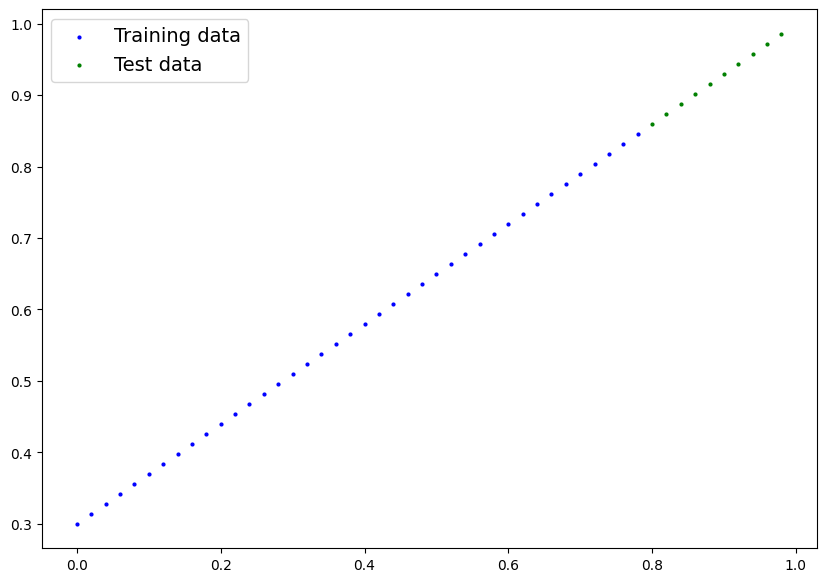

In [ ]:
# Plot the data
# Note: uses plot_predictions() fn
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building a PyTorch linear model

In [ ]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters / also called: linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features = 1)
  def forward(self, x : torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set manual_seed
torch.manual_seed(42)

model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

### 6.3 Training

for training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [ ]:
# Set up loss function
loss_fn = nn.L1Loss() # same as MAE

# Set up our optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)

In [ ]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device ( device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  #1. Forward Pass
  y_preds = model_1(X_train)

  #2. Loss function
  loss = loss_fn(y_preds, y_train)

  #3. optimizer zero grad
  optimizer.zero_grad()

  #4. backpropagation
  loss.backward()

  #5.step update through Gradient descent
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_preds = model_1(X_test)
    test_loss = loss_fn(test_preds, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch : {epoch} | Loss : {loss} | Test loss : {test_loss}")

Epoch : 0 | Loss : 0.5551779866218567 | Test loss : 0.5739762187004089
Epoch : 10 | Loss : 0.4399680495262146 | Test loss : 0.4392663538455963
Epoch : 20 | Loss : 0.3247582018375397 | Test loss : 0.30455657839775085
Epoch : 30 | Loss : 0.20954827964305878 | Test loss : 0.16984674334526062
Epoch : 40 | Loss : 0.09433844685554504 | Test loss : 0.03513689711689949
Epoch : 50 | Loss : 0.023886386305093765 | Test loss : 0.04784906655550003
Epoch : 60 | Loss : 0.0199567973613739 | Test loss : 0.04580312222242355
Epoch : 70 | Loss : 0.016517987474799156 | Test loss : 0.0375305712223053
Epoch : 80 | Loss : 0.013089170679450035 | Test loss : 0.029944902285933495
Epoch : 90 | Loss : 0.009653178043663502 | Test loss : 0.02167237363755703
Epoch : 100 | Loss : 0.006215679459273815 | Test loss : 0.014086711220443249
Epoch : 110 | Loss : 0.002787243574857712 | Test loss : 0.005814164876937866
Epoch : 120 | Loss : 0.0012645035749301314 | Test loss : 0.013801807537674904
Epoch : 130 | Loss : 0.00126450

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [ ]:
weight, bias

(0.7, 0.3)

###6.4 Making and evaluating predictions

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

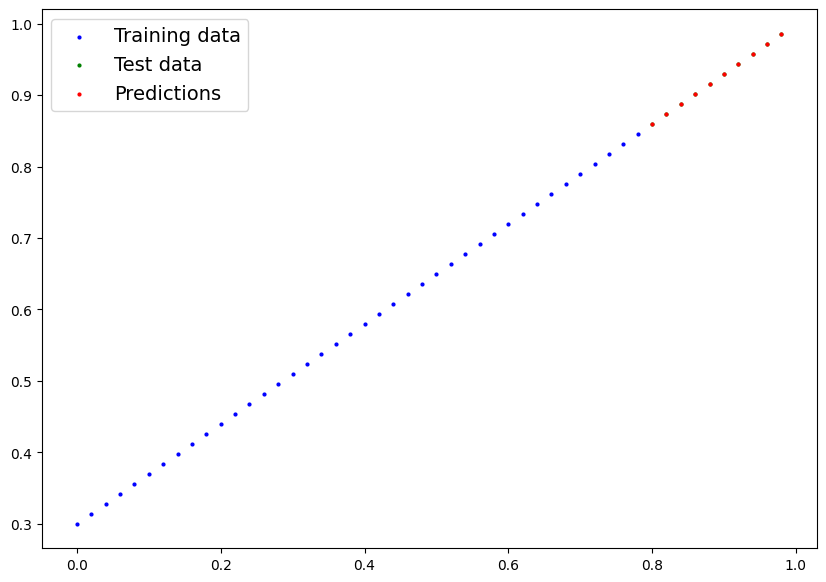

In [ ]:
# Check out our model predictions visually
plot_predictions(predictions=y_preds.cpu()) #matplotlib works with numpy

###6.5 Saving and loading a trained model

In [ ]:
from pathlib import Path

#1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok = True)

# 2. Create model save path
MODEL_NAME = 'O1_pytorch_workflow_model_1.pt'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Save the model state dict
print(f"Saving  model to {MODEL_SAVE_PATH}")
torch.save(obj = model_1.state_dict(), f = MODEL_SAVE_PATH)

Saving  model to models/O1_pytorch_workflow_model_1.pt


In [ ]:
# Load a PyTorch model

#New instance of LRMv2
loaded_model_1 = LinearRegressionModelV2()

#Load the saved model
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# PUt the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [ ]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])